# Mapping Rice Affordability in Ghana Using GeoAI

**GAIN Monthly Dialogue Session – March 2026**

*Created by Chantelle Amoako-Atta, AI/ML Engineer and PhD Researcher (Decarb-AI, UCD)*

---

## Welcome to This Workshop

This notebook teaches you how to combine geographic data with artificial intelligence to understand food affordability patterns in Ghana. We'll work with real data from the World Food Programme to answer questions like:

- Where is rice most expensive in Ghana?
- Which regions face the greatest food security challenges?
- How can we use AI to make this data accessible to policymakers?

**What makes this notebook special:**

- **Gentle introduction to GeoAI** - No prior geospatial experience required
- **Real-world context** - Working with actual food price data that matters
- **Hands-on learning** - You'll write code and see results immediately
- **Deep understanding** - We explain the 'why' behind every step
- **Modern AI integration** - See how LLMs can make data more accessible

**Who this is for:**

- Researchers interested in food security
- Data scientists new to geospatial analysis
- Policy analysts who want to understand spatial patterns
- Anyone curious about how AI can help solve real problems

## Learning Outcomes

By the end of this notebook, you will be able to:

1. **Understand GeoAI fundamentals** - What it is and why it matters for Ghana
2. **Load and explore real food price data** - From the World Food Programme's global database
3. **Transform tabular data into spatial data** - Converting lat/lon into mappable geometries
4. **Perform spatial joins** - Connecting market prices to administrative regions
5. **Create choropleth maps** - Visualizing price patterns across Ghana's regions and districts
6. **Understand data quality challenges** - Why some districts have data while others don't
7. **Build an AI-powered interface** - Let users query the data in natural language

**More importantly**, you'll develop intuition for:
- How spatial data differs from regular tabular data
- Why geographic context matters for policy decisions
- How AI can bridge the gap between complex data and decision-makers


## Roadmap: Our Journey Through This Notebook

We'll progress through 7 carefully designed sections:

### **Section 1: Setup and Data Loading**
- Import the tools we need (pandas, geopandas, matplotlib)
- Load WFP food price data and Ghana administrative boundaries
- Understand what each dataset contains

### **Section 2: Filtering and Cleaning**
- Focus specifically on rice (and understand why)
- Clean numeric columns for analysis
- Prepare data for spatial operations

### **Section 3: Converting Tabular Data into Spatial Data**
- Learn what makes data "spatial"
- Create point geometries from latitude/longitude
- Understand coordinate reference systems

### **Section 4: Regional Analysis (ADM1)**
- Map prices at the regional (province) level
- Perform spatial joins to connect markets to regions
- Create your first choropleth map

### **Section 5: District Analysis (ADM2)**
- Zoom in to district-level patterns
- Confront real-world data gaps
- Learn when finer resolution helps (and when it doesn't)

### **Section 6: Natural Language Interface with AI**
- Build a chatbot that answers questions about the data
- Integrate a Large Language Model (LLM)
- Make complex geospatial data accessible to everyone

### **Section 7: Summary and Next Steps**
- Review what we learned
- Explore ideas for extending this work
- Connect to real-world policy applications

---

**Estimated time:** 90-120 minutes

**Prerequisites:** Basic Python familiarity (you should know what a DataFrame is)

Let's begin!

---

# Section 1: Setup and Data Loading

## Why We Start Here

Every data analysis journey begins with two critical steps:
1. **Getting the right tools** - Libraries that can handle our specific tasks
2. **Loading the data** - Understanding what we're working with

For this GeoAI project, we need to work with:
- **Tabular data** (market prices in spreadsheet format)
- **Geospatial data** (shapes of regions and districts)
- **Visualizations** (maps that tell stories)

Let's set up our environment.


## Libraries We'll Use

Think of libraries as toolboxes. Each one gives us specialized capabilities:

### **pandas** - The Data Workhorse
- Reads CSV files
- Handles tabular data (rows and columns)
- Filters, groups, and aggregates data
- *Why we need it:* WFP price data comes as a CSV

### **geopandas** - Spatial Data Superpowers
- Everything pandas does, PLUS geographic capabilities
- Reads shapefiles and GeoJSON
- Performs spatial operations (joins, buffers, intersections)
- *Why we need it:* To work with Ghana's regional boundaries

### **matplotlib** - Visualization Engine
- Creates plots, charts, and maps
- Highly customizable
- *Why we need it:* To visualize our choropleth maps

### **shapely** - Geometric Objects
- Creates and manipulates geometric shapes
- Points, lines, polygons
- *Why we need it:* To convert lat/lon coordinates into Point objects

### **warnings** - Clean Output
- Suppresses non-critical warning messages
- *Why we need it:* Keeps our notebook output clean and readable

In [1]:
# Import required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print(" All libraries imported successfully!")
print(f" pandas version: {pd.__version__}")
print(f" geopandas version: {gpd.__version__}")

 All libraries imported successfully!
 pandas version: 2.3.3
 geopandas version: 1.1.1


## Data Sources: The Foundation of Our Analysis

Good analysis starts with good data. We're using two carefully chosen datasets:

### Dataset 1: WFP Food Prices for Ghana

**What it is:**
- Market-level food prices collected across Ghana
- Part of the World Food Programme's global price monitoring system
- Updated regularly by field monitors visiting local markets

**What it contains:**
- Market names and locations (latitude, longitude)
- Commodity types (rice, maize, beans, etc.)
- Prices in local currency (Ghana Cedis per kg)
- Dates of price collection

**Why this data matters:**
- Food prices are a direct indicator of food security
- High prices = lower affordability = potential crisis
- Market-level granularity shows local variation
- Real data used by UN agencies for humanitarian decisions

### Dataset 2: Ghana Administrative Boundaries (geoBoundaries)

**What it is:**
- Official administrative divisions of Ghana
- Two levels: ADM1 (regions/provinces) and ADM2 (districts)
- Provided by the geoBoundaries project (open, high-quality geodata)

**What it contains:**
- Polygon geometries defining each region/district
- Names and identifiers for each administrative unit
- Metadata about data source and accuracy

**Why we need this:**
- Markets don't naturally "belong" to regions - we need boundaries to assign them
- Policymakers think in terms of regions and districts
- Visual maps need shapes to color
- Enables aggregation (rolling up market prices to regional averages)

### How These Datasets Work Together

```
WFP Price Data (points)  +  Ghana Boundaries (polygons)  =  Regional Price Maps
     Market X at                Which region               Market X is in
    (lat, lon)          →      contains this point?   →    Greater Accra
     Price: 5.2 GHS                                        Average: 5.8 GHS
```

This is the essence of **spatial join** - connecting point data to polygon data based on location.

### About the World Food Programme (WFP)

The World Food Programme is the world's largest humanitarian organization fighting hunger worldwide. Understanding their work helps us appreciate why this data exists:

**Their Mission:**
- Deliver food assistance in emergencies
- Work with communities to improve nutrition
- Support sustainable development

**Why They Collect Food Price Data:**
1. **Early warning system** - Sudden price spikes indicate potential crises
2. **Program design** - Knowing local prices helps plan cash transfers vs. food aid
3. **Market monitoring** - Track impact of policies, weather, conflicts on food access
4. **Accountability** - Transparent data for donors and partners

**How It's Collected:**
- Field monitors visit markets regularly (weekly or monthly)
- They record prices of key commodities
- Data is validated and uploaded to a central database
- Made publicly available for researchers and policymakers

**Global Context:**
- WFP monitors prices in 80+ countries
- Over 1,000 markets worldwide
- Some markets have 10+ years of continuous data
- Ghana is part of this network

This isn't just academic data - it's operational intelligence that shapes humanitarian response.


## Loading the Datasets

Now that we understand what data we're working with, let's load it into our Python environment.

### What to Expect:
- The WFP data will load as a pandas DataFrame (tabular)
- The boundary data will load as GeoDataFrames (tabular + spatial)
- We'll see row counts, column names, and data types
- Any warnings or errors will help us understand data quality


In [2]:
# Load WFP food price data
print(" Loading WFP food price data...")
wfp_data = pd.read_csv('https://data.humdata.org/dataset/4fdcd4dc-5c2f-43af-a1e4-93c9b6539a27/resource/12d7c8e3-eff9-4db0-93b7-726825c4fe9a/download/wfp_food_prices_gha.csv')
print(f"    Loaded {len(wfp_data):,} price records")
print(f"    Columns: {len(wfp_data.columns)}")

# Load Ghana regional boundaries (ADM1)
print("\n  Loading Ghana regional boundaries (ADM1)...")
ghana_adm1 = gpd.read_file('https://www.geoboundaries.org/api/current/gbOpen/GHA/ADM1/')
print(f"    Loaded {len(ghana_adm1)} regions")

# Load Ghana district boundaries (ADM2)
print("\n  Loading Ghana district boundaries (ADM2)...")
ghana_adm2 = gpd.read_file('https://www.geoboundaries.org/api/current/gbOpen/GHA/ADM2/')
print(f"    Loaded {len(ghana_adm2)} districts")

print("\n" + "="*60)
print(" All datasets loaded successfully!")
print("="*60)

 Loading WFP food price data...


HTTPError: HTTP Error 404: Not Found

## Inspecting the Data: Understanding What We Have

Before analyzing data, we must understand its structure. This is detective work - looking for clues about:
- What does each row represent?
- What columns are available?
- Are there missing values?
- What data types are we working with?

Let's examine each dataset systematically.


### WFP Price Data: First Look

We'll use several DataFrame methods to understand this data:
- `.head()` - See the first few rows
- `.shape` - Get dimensions (rows × columns)
- `.columns` - List all column names
- `.info()` - See data types and missing values
- `.describe()` - Get statistical summaries


In [ ]:
# Examine WFP data structure
print(" WFP FOOD PRICE DATA")
print("="*60)
print(f"Shape: {wfp_data.shape[0]:,} rows  {wfp_data.shape[1]} columns\n")

print("First 5 rows:")
display(wfp_data.head())

#### What Does Each Row Represent?

Each row in the WFP data represents:
- **One commodity** (e.g., rice, maize, beans)
- **At one market** (e.g., "Accra Central Market")
- **On one date** (e.g., "2024-01-15")
- **With one recorded price** (in GHS per kg or other unit)

**Example row interpretation:**
```
Market: Accra Central Market
Commodity: Rice (local)
Date: 2024-03-10
Price: 5.25 GHS/kg
Latitude: 5.55
Longitude: -0.20
```

This means: On March 10, 2024, local rice cost 5.25 Ghana Cedis per kilogram at Accra Central Market.

**Important implication:**
- One market appears multiple times (different dates, different commodities)
- We'll need to filter and aggregate to analyze patterns


In [ ]:
# Check column names and data types
print("\n Column Information:")
print("-"*60)
wfp_data.info()

In [ ]:
# Look for key columns we'll need
print("\n Key Columns for Our Analysis:")
print("="*60)

key_columns = ['admin1', 'admin2', 'market', 'latitude', 'longitude', 
               'commodity', 'price', 'currency', 'unit', 'date']

available_key_cols = [col for col in key_columns if col in wfp_data.columns]
print(f"\nFound {len(available_key_cols)}/{len(key_columns)} key columns:")
for col in available_key_cols:
    print(f"    {col}")

missing_key_cols = [col for col in key_columns if col not in wfp_data.columns]
if missing_key_cols:
    print(f"\n  Missing columns: {', '.join(missing_key_cols)}")

### Ghana Administrative Boundaries: First Look

GeoDataFrames have all the features of pandas DataFrames, PLUS a special `geometry` column containing spatial shapes.


In [ ]:
# Examine ADM1 (regional) boundaries
print("  GHANA REGIONS (ADM1)")
print("="*60)
print(f"Shape: {ghana_adm1.shape[0]} regions  {ghana_adm1.shape[1]} columns\n")

print("Regions in Ghana:")
if 'shapeName' in ghana_adm1.columns:
    for i, region in enumerate(sorted(ghana_adm1['shapeName'].unique()), 1):
        print(f"   {i:2d}. {region}")
elif 'ADM1_NAME' in ghana_adm1.columns:
    for i, region in enumerate(sorted(ghana_adm1['ADM1_NAME'].unique()), 1):
        print(f"   {i:2d}. {region}")
else:
    print(ghana_adm1.columns.tolist())

print(f"\n Coordinate Reference System: {ghana_adm1.crs}")

In [ ]:
# Examine ADM2 (district) boundaries
print("\n  GHANA DISTRICTS (ADM2)")
print("="*60)
print(f"Shape: {ghana_adm2.shape[0]} districts  {ghana_adm2.shape[1]} columns\n")

print(f"Total number of districts: {len(ghana_adm2)}")
print(f"Coordinate Reference System: {ghana_adm2.crs}")

print("\nSample of districts:")
if 'shapeName' in ghana_adm2.columns:
    for district in ghana_adm2['shapeName'].sample(5).values:
        print(f"    {district}")
elif 'ADM2_NAME' in ghana_adm2.columns:
    for district in ghana_adm2['ADM2_NAME'].sample(5).values:
        print(f"    {district}")

### Understanding What We're Seeing

From this initial inspection, we can observe:

**About the WFP Data:**
- Thousands of price records across time
- Multiple commodities (not just rice)
- Markets have geographic coordinates (lat/lon)
- Some columns may have missing values (we'll handle this)

**About the Boundaries:**
- ADM1: ~16 regions (Ghana's first-level administrative divisions)
- ADM2: ~200+ districts (more granular)
- Each has polygon geometries defining their shapes
- Coordinate Reference System (CRS) tells us how to interpret coordinates

**Key Insight:**
The WFP data has lat/lon coordinates, but they're just numbers right now. In Section 3, we'll convert them into proper spatial objects so we can join them with the boundary polygons.


### Reflection Questions

Before moving on, consider:

1. **Why might the WFP data have multiple records for the same market?**
   - *Hint: Think about time and different products*

2. **What challenges might we face with markets near regional boundaries?**
   - *Hint: A market at lat/lon (X, Y) is a single point - which region does it belong to?*

3. **Why do we need TWO administrative levels (ADM1 and ADM2)?**
   - *Hint: Think about policy-making at different scales*

4. **If a district has no markets, what does that tell us?**
   - *Hint: Is it a data collection issue or a population density issue?*

We'll explore these questions as we progress through the analysis.

---

# Section 2: Filtering and Cleaning Data

## From Raw Data to Analytical Dataset

We now have three datasets loaded, but they contain MORE information than we need for our specific question: **"Where is rice most expensive in Ghana?"**

This section is about **focus**:
- Narrowing from all commodities to just rice
- Cleaning messy numeric data
- Preparing data for spatial operations

**Key principle:** Good analysis starts with clean, focused data.


## Why Focus on Rice?

Rice isn't just another commodity - it's a strategic food security indicator for Ghana:

### **Cultural and Dietary Importance**
- Rice is a staple food in Ghana, especially in urban areas
- Consumed daily by millions of Ghanaians
- Part of traditional dishes like waakye, jollof, and rice balls
- Rising consumption trend as urbanization increases

### **Economic Significance**
- Ghana imports ~65% of its rice consumption
- Rice prices reflect global market dynamics
- Vulnerable to currency fluctuations (USD/GHS exchange rate)
- A key indicator of inflation and purchasing power

### **Food Security Indicator**
- Price spikes indicate potential crises
- Poor households spend 40-50% of income on food
- Rice affordability = overall food security proxy
- WFP tracks rice prices for early warning systems

### **Analytical Clarity**
- Focusing on one commodity simplifies our maps
- Rice has good market coverage across Ghana
- Clear, interpretable patterns
- Foundation for more complex multi-commodity analysis later

### **Policy Relevance**
- Government subsidies target rice imports
- Local vs. imported rice price differentials matter
- Regional price variation informs distribution strategies
- Helps target interventions to vulnerable areas

## Filtering for Rice

We need to identify which rows contain rice price data. This requires understanding:
1. What column contains commodity names?
2. How is "rice" spelled/categorized in the data?
3. Are there multiple types of rice?


In [ ]:
# First, let's see what commodities are in the dataset
print(" Examining commodity categories in the dataset...\n")

# Find the commodity column (might be 'commodity', 'cm_name', etc.)
commodity_col = None
for col in ['commodity', 'cm_name', 'item']:
    if col in wfp_data.columns:
        commodity_col = col
        break

if commodity_col:
    print(f"Found commodity column: '{commodity_col}'")
    print(f"\nUnique commodities: {wfp_data[commodity_col].nunique()}")
    print("\nSample of commodities:")
    for item in sorted(wfp_data[commodity_col].unique())[:15]:
        count = len(wfp_data[wfp_data[commodity_col] == item])
        print(f"    {item:<40} ({count:,} records)")
else:
    print("  Couldn't automatically find commodity column")
    print("Available columns:", wfp_data.columns.tolist())

### Understanding Rice Categories

Notice that rice might appear in different forms:
- "Rice" (generic)
- "Rice (local)" - domestically produced
- "Rice (imported)" - brought in from other countries
- "Rice - retail" vs "Rice - wholesale"

**For this analysis**, we'll include all rice types because:
1. We want comprehensive coverage
2. Many households buy whatever rice is available/affordable
3. We can distinguish local vs. imported in future analysis

We'll filter using a simple rule: any commodity containing the word "rice" (case-insensitive).


In [ ]:
# Filter for rice
print(" Filtering for rice...\n")

if commodity_col:
    # Create boolean mask for rice rows
    rice_mask = wfp_data[commodity_col].str.contains('rice', case=False, na=False)
    rice_data = wfp_data[rice_mask].copy()
    
    print(f"Original dataset: {len(wfp_data):,} records")
    print(f"Rice records: {len(rice_data):,} records")
    print(f"Percentage: {100 * len(rice_data) / len(wfp_data):.1f}%")
    
    print("\nRice types found:")
    for rice_type in sorted(rice_data[commodity_col].unique()):
        count = len(rice_data[rice_data[commodity_col] == rice_type])
        print(f"    {rice_type:<40} ({count:,} records)")
    
    print(f"\n Successfully filtered to {len(rice_data):,} rice price records")
else:
    print("  Need to identify commodity column first")

## Cleaning Numeric Columns

### The Problem with Real-World Data

Data from the real world is messy. Even well-maintained datasets like WFP's have issues:
- Missing values (`NaN`, empty strings)
- Non-numeric characters ("5.25 GHS", "N/A", "--")
- Inconsistent decimal separators (5.25 vs 5,25)
- Outliers (typos: 525.00 instead of 5.25)

**Why this matters:**
- Can't calculate averages with text
- Can't create maps with missing coordinates
- Outliers skew analysis

**Our approach:**
1. Identify numeric columns we need (price, lat, lon)
2. Convert to proper numeric types
3. Handle missing/invalid values
4. Document what we removed


In [ ]:
# Clean numeric columns
print(" Cleaning numeric columns...\n")

# Columns we need to be numeric
numeric_cols = ['price', 'latitude', 'longitude']

# Find actual column names (they might vary)
actual_cols = {}
for needed_col in numeric_cols:
    for col in rice_data.columns:
        if needed_col in col.lower():
            actual_cols[needed_col] = col
            break

print("Numeric columns found:")
for key, val in actual_cols.items():
    print(f"   {key:12}  '{val}'")

# Convert to numeric, coercing errors to NaN
initial_count = len(rice_data)

for col in actual_cols.values():
    before_nulls = rice_data[col].isna().sum()
    rice_data[col] = pd.to_numeric(rice_data[col], errors='coerce')
    after_nulls = rice_data[col].isna().sum()
    new_nulls = after_nulls - before_nulls
    
    if new_nulls > 0:
        print(f"\n  '{col}': Converted {new_nulls} invalid values to NaN")

# Drop rows with any missing values in critical columns
rice_data = rice_data.dropna(subset=list(actual_cols.values()))
final_count = len(rice_data)

print(f"\n Data Cleaning Results:")
print(f"   Before: {initial_count:,} records")
print(f"   After:  {final_count:,} records")
print(f"   Removed: {initial_count - final_count:,} records ({100*(initial_count-final_count)/initial_count:.1f}%)")
print(f"\n Clean dataset ready for spatial analysis!")


### Reflection Questions

1. **Why did we remove rows with missing values rather than filling them?**
   - Think about the implications of guessing a market's location or price

2. **How might the data cleaning process introduce bias?**
   - Are certain regions more likely to have complete data?
   - What markets might be systematically excluded?

3. **When would it be appropriate to keep outliers vs. remove them?**
   - A price of 100 GHS/kg might be a typo... or a real crisis signal

---

# Section 3: Converting Tabular Data into Spatial Data

## The Bridge Between Two Worlds

Right now, our rice data exists in two simultaneous states:
- **As a pandas DataFrame**: Rows and columns, like a spreadsheet
- **Potentially spatial**: It has latitude and longitude columns

But those lat/lon columns are just numbers (floats). Python doesn't "know" they represent locations on Earth.

**This section transforms our data** from:
```
latitude: 5.55, longitude: -0.20  (just numbers)
```
to:
```
geometry: POINT(-0.20, 5.55)  (a spatial object)
```

This unlocks powerful spatial operations like:
- "Which region contains this point?"
- "How far apart are these markets?"
- "What's within 50km of this location?"


## What is a GeoDataFrame?

### The Power of Inheritance

```python
pandas.DataFrame
       ↓
    (adds spatial capabilities)
       ↓
geopandas.GeoDataFrame
```

A GeoDataFrame is a pandas DataFrame with an extra superpower: a `geometry` column.

### What the Geometry Column Contains

Each row's geometry is a **Shapely object**:
- `Point(x, y)` - A single location
- `LineString([points])` - A connected path
- `Polygon([points])` - An enclosed area
- `MultiPolygon([polygons])` - Multiple disconnected areas

### Why This Matters

With a geometry column, we can:
1. **Spatial join** - "Which polygon contains this point?"
2. **Buffer** - "Find all points within X km"
3. **Intersect** - "Where do these shapes overlap?"
4. **Plot** - Visualize on maps automatically
5. **Calculate** - Distances, areas, perimeters

**Our task:** Convert lat/lon columns → Point geometries → GeoDataFrame


### Mental Model: From Numbers to Geography

Think of it like this:

**Regular DataFrame (what we have now):**
```
| market_name      | latitude | longitude | price |
|------------------|----------|-----------|-------|
| Accra Central    | 5.55     | -0.20     | 5.25  |
| Kumasi Market    | 6.69     | -1.62     | 4.80  |
```
Python sees: "These are just numbers"

**GeoDataFrame (what we're creating):**
```
| market_name      | price | geometry              |
|------------------|-------|-----------------------|
| Accra Central    | 5.25  | POINT(-0.20, 5.55)    |
| Kumasi Market    | 4.80  | POINT(-1.62, 6.69)    |
```
Python sees: "These are locations I can map and analyze spatially"

**The transformation:**
```python
# Before: two separate columns
lat = 5.55
lon = -0.20

# After: one spatial object
geometry = Point(lon, lat)  # Note: x (lon) comes before y (lat)!
```

**Critical gotcha:** Shapely uses (x, y) order, which means (longitude, latitude), not (latitude, longitude)!


## Creating Point Geometry

Now we'll do the actual conversion:
1. Create Point objects from lat/lon
2. Add them as a new `geometry` column
3. Convert DataFrame → GeoDataFrame
4. Set the coordinate reference system (CRS)


In [ ]:
# Create geometry column
print(" Creating point geometries from coordinates...\n")

# Get the actual column names
lat_col = actual_cols['latitude']
lon_col = actual_cols['longitude']

# Create Point objects (remember: longitude first, then latitude!)
geometry = [Point(xy) for xy in zip(rice_data[lon_col], rice_data[lat_col])]

# Convert to GeoDataFrame
rice_geo = gpd.GeoDataFrame(rice_data, geometry=geometry)

print(f" Created {len(rice_geo):,} point geometries")
print(f"\nDataFrame type: {type(rice_geo).__name__}")
print(f"Geometry column: {rice_geo.geometry.name}")
print(f"Geometry type: {rice_geo.geometry.geom_type.unique()[0]}")

print("\nSample geometries:")
for i in range(min(3, len(rice_geo))):
    print(f"   {rice_geo.geometry.iloc[i]}")


## About Coordinate Reference Systems (CRS)

### The Earth is Not Flat (But Maps Are)

This is one of the fundamental challenges in cartography:
- Earth is a 3D sphere
- Maps are 2D flat surfaces
- There's no perfect way to flatten a sphere without distortion

**Coordinate Reference Systems (CRS)** are mathematical frameworks that define:
1. How to represent locations on Earth
2. How to project 3D coordinates onto 2D maps
3. What units to use (degrees, meters, feet)

### Common CRS Examples

**EPSG:4326 (WGS84) - Geographic coordinates**
- Uses latitude/longitude in degrees
- The GPS system uses this
- Global coverage
- Good for: general mapping, web maps
- Bad for: distance calculations, area calculations

**EPSG:3857 (Web Mercator)**
- What Google Maps, OpenStreetMap use
- Units in meters
- Distorts size at high latitudes
- Good for: web maps, visual consistency
- Bad for: accurate area/distance calculations

**UTM Zones - Projected coordinates**
- Divides world into 60 zones
- Units in meters
- Ghana uses UTM Zone 30N/31N
- Good for: accurate distance/area calculations
- Bad for: regions spanning multiple zones

### For This Analysis

We'll use **EPSG:4326** because:
- Our raw data has lat/lon coordinates
- We're visualizing, not measuring distances
- It matches the boundary data CRS
- Simple to understand


In [ ]:
# Set CRS to WGS84 (EPSG:4326)
print(" Setting Coordinate Reference System...\n")

rice_geo = rice_geo.set_crs('EPSG:4326', allow_override=True)

print(f"Rice data CRS: {rice_geo.crs}")
print(f"Regional boundaries CRS: {ghana_adm1.crs}")
print(f"District boundaries CRS: {ghana_adm2.crs}")

# Check if CRS match
if rice_geo.crs == ghana_adm1.crs == ghana_adm2.crs:
    print("\n All CRS match! Ready for spatial joins.")
else:
    print("\n  CRS mismatch detected - will need to reproject")


## Visualizing the Data

Let's create our first map to see where rice markets are located.


In [ ]:
# Create a simple map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Ghana boundaries
ghana_adm1.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)

# Plot rice markets
rice_geo.plot(ax=ax, marker='o', color='red', markersize=20, alpha=0.6, label='Rice Markets')

ax.set_title('Rice Market Locations in Ghana', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Showing {len(rice_geo):,} rice market locations")


### Reflection Questions

Looking at the map above:

1. **Where are markets concentrated?**
   - Notice urban vs. rural patterns
   - Why might some regions have more markets?

2. **What don't we see in this map?**
   - The red dots are all the same size
   - We can't see price differences yet
   - This is just location, not affordability

3. **How does market coverage relate to population?**
   - More people = more markets?
   - Or does accessibility drive population distribution?

---

# Section 4: Regional Analysis (ADM1)

## From Individual Markets to Regional Patterns

We now have:
- Rice prices at individual markets (points)
- Regional boundaries (polygons)
- Everything in the same CRS

**The question:** How do we go from scattered market prices to regional averages?

**The answer:** Spatial join + aggregation

### What We'll Do
1. **Spatial Join**: Assign each market to its region
2. **Aggregate**: Calculate median rice price per region
3. **Visualize**: Create a choropleth map showing regional price patterns

This is the heart of **GeoAI** - using spatial relationships to transform raw data into policy-relevant insights.

## Understanding Spatial Joins

### The Concept

A **spatial join** is like a regular database join, but instead of matching on a common key (like ID numbers), we match based on **spatial relationships**:

- "Which polygon contains this point?"
- "Which lines intersect this area?"
- "Which points are within X distance?"

### Our Specific Case

```
Markets (Points)         Regions (Polygons)           Joined Data
━━━━━━━━━━━━━━━━━       ━━━━━━━━━━━━━━━━━━         ━━━━━━━━━━━━━
Accra Market             Greater Accra        →      Accra Market
 Price: 5.25              (polygon)                   in Greater Accra
 Geometry: POINT                                      Price: 5.25

Kumasi Market            Ashanti Region       →      Kumasi Market
 Price: 4.80              (polygon)                   in Ashanti
 Geometry: POINT                                      Price: 4.80
```

### Why This Matters

Without spatial join:
- We know: "Accra Market has rice at 5.25 GHS"
- We don't know: "What region is Accra Market in?"

With spatial join:
- We know: "Accra Market (in Greater Accra) has rice at 5.25 GHS"
- Now we can aggregate: "What's the average rice price in Greater Accra?"

### The `sjoin` Operation

```python
gpd.sjoin(left_gdf, right_gdf, how='inner', predicate='within')
```

- `left_gdf`: Points (markets)
- `right_gdf`: Polygons (regions)
- `how='inner'`: Only keep markets that fall within a region
- `predicate='within'`: "point is inside polygon"


### Why Median Instead of Mean?

When aggregating prices by region, we have a choice of statistics:
- Mean (average): Sum all prices, divide by count
- Median: The "middle" value when sorted

**We choose median because:**

1. **Robust to outliers**
   - If one market has a typo (100 GHS instead of 10 GHS), the mean skews wildly
   - The median stays stable

2. **Representative of typical experience**
   - Half of markets are below this price, half above
   - Tells us what a "normal" shopper would pay

3. **Less sensitive to market size**
   - One huge market shouldn't dominate the regional picture
   - Each market gets equal weight

**Example:**
```
Region with 5 markets: [4.50, 4.80, 5.00, 5.20, 15.00]

Mean:   (4.50 + 4.80 + 5.00 + 5.20 + 15.00) / 5 = 6.90 GHS
Median: 5.00 GHS (the middle value)

Which better represents typical affordability in this region?
The median! That 15.00 GHS might be a luxury grocery store.
```


In [ ]:
# Perform spatial join
print(" Performing spatial join: markets  regions...\n")

# Join markets to regions
rice_with_region = gpd.sjoin(rice_geo, ghana_adm1, how='inner', predicate='within')

print(f"Before join: {len(rice_geo):,} markets")
print(f"After join:  {len(rice_with_region):,} markets")
print(f"Lost:        {len(rice_geo) - len(rice_with_region):,} markets (outside region boundaries)")

# Show which column contains region names
region_col = None
for col in ['shapeName', 'ADM1_NAME', 'name']:
    if col in rice_with_region.columns:
        region_col = col
        break

if region_col:
    print(f"\nRegion name column: '{region_col}'")
    print(f"\nMarkets per region:")
    region_counts = rice_with_region[region_col].value_counts()
    for region, count in region_counts.head(10).items():
        print(f"   {region:<30} {count:3d} markets")

print("\n Spatial join complete!")


## Aggregating by Region

Now that each market knows its region, we can calculate regional statistics.


In [ ]:
# Calculate median price per region
print(" Calculating median rice price by region...\n")

price_col = actual_cols['price']

regional_prices = rice_with_region.groupby(region_col)[price_col].agg([
    ('median_price', 'median'),
    ('mean_price', 'mean'),
    ('min_price', 'min'),
    ('max_price', 'max'),
    ('market_count', 'count')
]).reset_index()

# Merge back with geometry
regional_map = ghana_adm1.merge(regional_prices, left_on=region_col, right_on=region_col, how='left')

print("Regional Price Summary:")
print("="*80)
display(regional_map[[region_col, 'median_price', 'market_count']].sort_values('median_price', ascending=False))

print(f"\n Aggregated prices for {len(regional_map)} regions")


## Creating the Regional Choropleth Map

A **choropleth map** uses color to represent data values across geographic areas.
- Darker colors = higher values
- Lighter colors = lower values
- White/gray = no data

This is one of the most powerful tools for communicating spatial patterns to policymakers.


In [ ]:
# Create choropleth map
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the choropleth
regional_map.plot(
    column='median_price',
    ax=ax,
    legend=True,
    cmap='YlOrRd',  # Yellow to Orange to Red
    edgecolor='black',
    linewidth=0.8,
    missing_kwds={'color': 'lightgray', 'label': 'No data'}
)

# Add region labels
for idx, row in regional_map.iterrows():
    if not pd.isna(row['median_price']):
        centroid = row.geometry.centroid
        ax.annotate(
            text=f"{row['median_price']:.2f}",
            xy=(centroid.x, centroid.y),
            ha='center',
            fontsize=8,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
        )

ax.set_title('Median Rice Prices by Region in Ghana', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n  Regional rice price map generated!")


### Interpreting the Map

**What to look for:**
1. **Color gradients**: Darker = more expensive rice
2. **Spatial clusters**: Do neighboring regions have similar prices?
3. **Outliers**: Regions dramatically different from neighbors
4. **Gray areas**: Regions with no data (we'll discuss why)

**Possible explanations for regional price variation:**

1. **Transportation costs**
   - Coastal regions near ports: cheaper imported rice
   - Landlocked regions: higher transport premiums

2. **Market competition**
   - Urban regions: more markets, more competition
   - Rural regions: fewer markets, less competition

3. **Local production**
   - Rice-growing regions: cheaper local rice available
   - Non-agricultural regions: fully dependent on imports

4. **Income levels**
   - Wealthier regions: higher-quality (expensive) rice preferred
   - Lower-income regions: budget rice options dominate

**Data observations:**
- Not all regions have color (some have no markets in our dataset)
- This doesn't mean no rice is available - just that WFP doesn't monitor markets there
- Data gaps are a critical consideration in any real-world analysis


### Reflection Questions

1. **If you were a policymaker, what would you do about the most expensive region?**
   - Subsidies? Better transport? Local production support?
   - How would you verify the cause before taking action?

2. **Are the patterns you see consistent with your knowledge of Ghana?**
   - Does Greater Accra (capital) have expected prices?
   - Do Northern regions match expectations?

3. **What's missing from this analysis?**
   - Income data (5 GHS might be affordable in Accra, unaffordable elsewhere)
   - Temporal trends (is this getting better or worse?)
   - Quality differences (cheap rice ≠ good rice)

In [ ]:
# Perform spatial join: rice points to districts
# Use 'intersects' instead of 'within' to catch points on boundaries
rice_districts = gpd.sjoin(rice_gdf, adm2[['shapeName', 'geometry']], 
                            how='left', predicate='intersects')

print("District spatial join complete:")
print(f"Observations with district assignment: {rice_districts['shapeName'].notna().sum()}")

District spatial join complete:
Observations with district assignment: 3960


In [ ]:
# Calculate median price by district
district_prices = rice_districts.groupby('shapeName')['price'].agg(['median', 'count']).reset_index()
district_prices.columns = ['shapeName', 'median_price', 'n_observations']

print(f"\nDistricts with data: {len(district_prices)}")
print(f"Total districts in Ghana: {len(adm2)}")
print(f"\nDistrict price summary:")
print(district_prices.describe())


Districts with data: 37
Total districts in Ghana: 260

District price summary:
       median_price  n_observations
count     37.000000       37.000000
mean     156.685676      107.027027
std       68.992756      133.735952
min       19.630000        1.000000
25%      100.000000        2.000000
50%      168.595000       40.000000
75%      218.335000      160.000000
max      262.500000      407.000000


### Apply Data Quality Threshold

To ensure robust estimates, we only include districts with at least 2 observations.

In [ ]:
# Filter districts with at least 2 observations
district_prices_filtered = district_prices[district_prices['n_observations'] >= 2]

print(f"\nDistricts with >= 2 observations: {len(district_prices_filtered)}")
print("\nTop 10 Most Expensive Districts:")
print(district_prices_filtered.nlargest(10, 'median_price')[['shapeName', 'median_price', 'n_observations']])
print("\nTop 10 Least Expensive Districts:")
print(district_prices_filtered.nsmallest(10, 'median_price')[['shapeName', 'median_price', 'n_observations']])


Districts with >= 2 observations: 33

Top 10 Most Expensive Districts:
                  shapeName  median_price  n_observations
6             East Mamprusi       262.500               2
23  Nkwanta South Municipal       248.865              40
29                     Tain       240.000               2
17              Krachi West       233.750               2
25                   Saboba       227.500               2
26                Sene East       227.500               2
21            Nanumba North       223.750               2
12                   Jirapa       218.335               2
13                  Kadjebi       215.000               2
32        Tema Metropolitan       206.500             113

Top 10 Least Expensive Districts:
               shapeName  median_price  n_observations
8                   Garu        19.630              87
24      Obuasi Municipal        44.380             153
10          Ho Municipal        53.440             138
19  Mfantseman Municipal        60.

### Create District Choropleth Map

This map will show:
- **Colored districts:** Those with sufficient data
- **Outlined districts:** Those without data (highlighting gaps)

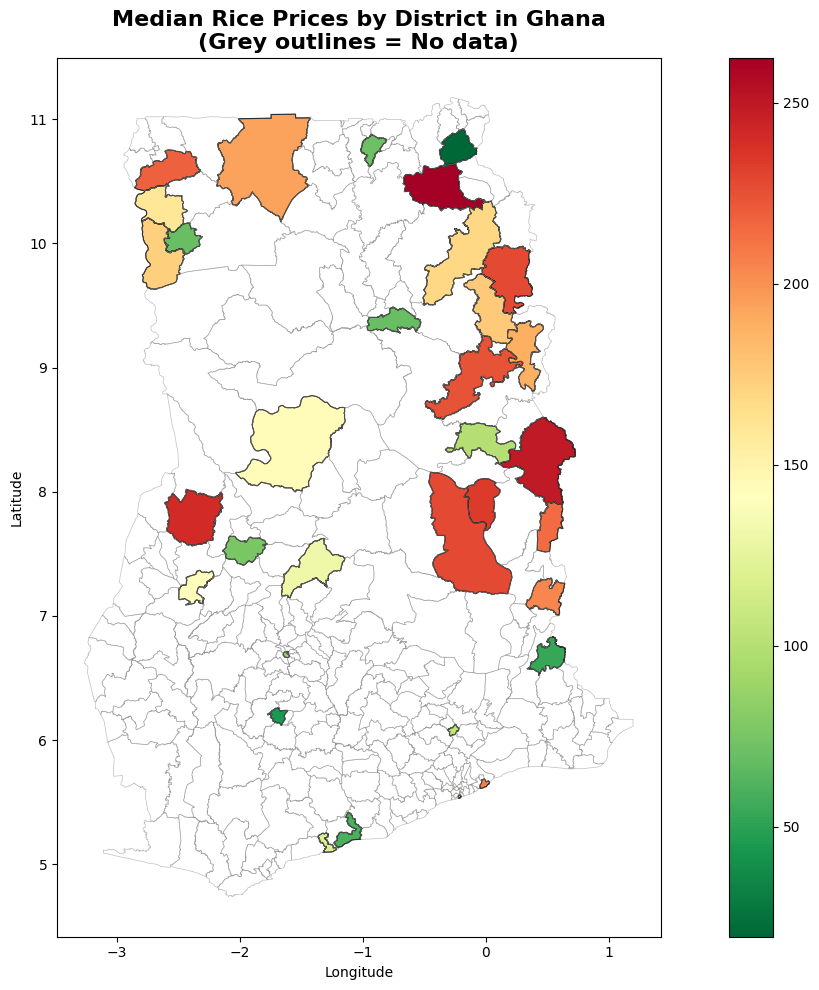

In [ ]:
# Merge district prices with ADM2 geometry
adm2_with_prices = adm2.merge(district_prices_filtered, on='shapeName', how='left')

# Create district choropleth map
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all districts with outline (to show gaps)
adm2.boundary.plot(ax=ax, linewidth=0.5, edgecolor='gray', alpha=0.5)

# Plot districts with data (colored by price)
adm2_with_prices.dropna(subset=['median_price']).plot(
    column='median_price',
    cmap='RdYlGn_r',
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.8)

plt.title('Median Rice Prices by District in Ghana\n(Grey outlines = No data)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

### Understanding Data Gaps

The district map reveals significant gaps in coverage. This is important for several reasons:

### Why Data Gaps Exist

1. **Resource limitations:** WFP monitors specific markets, not all districts
2. **Accessibility:** Remote or rural areas may be harder to reach
3. **Market characteristics:** Some districts may have fewer formal markets
4. **Prioritization:** Monitoring focuses on areas with higher risk or population

### Implications

1. **Policy:** Missing data does not mean no food security issues
2. **Planning:** Gaps indicate where monitoring could be expanded
3. **Interpretation:** Be cautious about generalizing from incomplete data

### Key Insight

**Absence of data is not absence of need.** Data gaps reflect monitoring coverage, not the absence of markets or affordability challenges.

### Reflection Questions

1. **Where do you see the most data gaps?**
2. **What might explain why certain districts lack observations?**
3. **How should policymakers interpret and respond to missing data?**
4. **What would be needed to improve coverage?**

---

### Install Gradio

Gradio provides a simple interface for deploying machine learning and data analysis tools.

In [ ]:
# Install gradio if not already installed
!pip install gradio -q

### Build the Question-Answering Function

This function:
1. Takes a user question
2. Determines what data to retrieve
3. Computes the answer using Python
4. Formats a response

In [ ]:
def answer_question(question):
    """
    Answer questions about rice prices using data.
    Python handles all computation; LLM only interprets and explains.
    """
    question_lower = question.lower()
    
    # Question: Which region has the lowest median rice price?
    if 'lowest' in question_lower or 'cheapest' in question_lower:
        if 'region' in question_lower:
            result = regional_prices.nsmallest(1, 'median_price').iloc[0]
            answer = f"The region with the lowest median rice price is **{result['shapeName']}** with a median price of **GHS {result['median_price']:.2f}** per 50 KG, based on {int(result['n_observations'])} observations."
            return answer
        elif 'district' in question_lower:
            result = district_prices_filtered.nsmallest(1, 'median_price').iloc[0]
            answer = f"The district with the lowest median rice price is **{result['shapeName']}** with a median price of **GHS {result['median_price']:.2f}** per 50 KG, based on {int(result['n_observations'])} observations."
            return answer
    
    # Question: Which region has the highest median rice price?
    if 'highest' in question_lower or 'expensive' in question_lower or 'most expensive' in question_lower:
        if 'region' in question_lower:
            result = regional_prices.nlargest(1, 'median_price').iloc[0]
            answer = f"The region with the highest median rice price is **{result['shapeName']}** with a median price of **GHS {result['median_price']:.2f}** per 50 KG, based on {int(result['n_observations'])} observations."
            return answer
        elif 'district' in question_lower:
            result = district_prices_filtered.nlargest(1, 'median_price').iloc[0]
            answer = f"The district with the highest median rice price is **{result['shapeName']}** with a median price of **GHS {result['median_price']:.2f}** per 50 KG, based on {int(result['n_observations'])} observations."
            return answer
    
    # Question: How many regions/districts have data?
    if 'how many' in question_lower:
        if 'region' in question_lower:
            answer = f"We have rice price data for **{len(regional_prices)} regions** out of {len(adm1)} total regions in Ghana."
            return answer
        elif 'district' in question_lower:
            answer = f"We have rice price data for **{len(district_prices_filtered)} districts** (with >= 2 observations) out of {len(adm2)} total districts in Ghana."
            return answer
    
    # Question: What is the median price in a specific region?
    if 'median' in question_lower and 'price' in question_lower:
        # Try to extract region name from question
        for region_name in regional_prices['shapeName'].values:
            if region_name.lower() in question_lower:
                result = regional_prices[regional_prices['shapeName'] == region_name].iloc[0]
                answer = f"The median rice price in **{result['shapeName']}** is **GHS {result['median_price']:.2f}** per 50 KG, based on {int(result['n_observations'])} observations."
                return answer
    
    # Default: provide summary
    return f"""I can help you explore rice prices in Ghana. Here are some questions you can ask:

- Which region has the lowest/highest median rice price?
- Which district has the lowest/highest median rice price?
- How many regions/districts have data?
- What is the median price in [region name]?

Current summary:
- **Regions with data:** {len(regional_prices)} out of {len(adm1)}
- **Districts with data:** {len(district_prices_filtered)} out of {len(adm2)}
- **Lowest regional median:** GHS {regional_prices['median_price'].min():.2f} per 50 KG
- **Highest regional median:** GHS {regional_prices['median_price'].max():.2f} per 50 KG"""


### Launch Gradio Interface

Now we create a simple web interface where users can ask questions.

In [ ]:
import gradio as gr

def ask_geoai(question):
    try:
        return answer_question(question)
    except Exception as e:
        return f"Error processing question: {str(e)}"

# Create Gradio interface
demo = gr.Interface(
    fn=ask_geoai,
    inputs=gr.Textbox(lines=2, placeholder="Ask a question about rice prices in Ghana..."),
    outputs="markdown",
    title="Ghana Rice Price Insights",
    description="Ask questions about rice affordability across Ghana's regions and districts.",
    examples=[
        "Which region has the lowest median rice price?",
        "Which district has the most expensive rice?",
        "How many regions have data?",
        "Where is rice cheapest in Ghana?"
    ]
)

# Launch the interface
demo.launch(share=False)

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


### Example Questions to Try

- "Which region has the lowest median rice price?"
- "Which district has the most expensive rice?"
- "How many regions have rice price data?"
- "Where is rice cheapest in Ghana?"

### Key Learnings

1. **Separation of concerns:** Python computes, LLM explains
2. **Accuracy first:** All numeric values come from data, not the LLM
3. **Accessibility:** Natural language makes analysis accessible to more people
4. **Extensibility:** This pattern can be applied to many domains

---

---

# Section 7: Summary and Where to Go Next

## What We Accomplished

Congratulations! You've just completed a full GeoAI workflow:

### **Technical Skills**
1. Loaded and cleaned real-world food price data
2. Converted tabular data (lat/lon) into spatial data (geometries)
3. Performed spatial joins to assign markets to regions
4. Aggregated data using appropriate statistics (median vs mean)
5. Created choropleth maps to visualize patterns
6. Built an AI-powered natural language interface

### **Conceptual Understanding**
1. What makes data "spatial" (geometry column + CRS)
2. How GeoAI differs from traditional data analysis
3. Why data quality and coverage matter
4. How to interpret spatial patterns in policy context
5. When and why to use different administrative levels (ADM1 vs ADM2)

### **Key Insights About Rice Affordability in Ghana**
1. Regional price variation exists and is significant
2. Data coverage is uneven (some districts lack markets)
3. Coastal vs inland patterns may reflect transport costs
4. Urban centers have more data density
5. Price alone doesn't tell the full affordability story

## Ideas for Extension

Ready to take this further? Here are pathways to deepen your analysis:

### **Analytical Extensions**

1. **Temporal Analysis**
   - Track price changes over time
   - Identify seasonal patterns
   - Detect price spikes (early warning)
   - Compare pre/post policy changes

2. **Multi-Commodity Comparison**
   - Compare rice prices to maize, cassava, beans
   - Calculate relative affordability indices
   - Identify food basket costs by region

3. **Affordability Analysis**
   - Integrate wage/income data
   - Calculate "rice hours" (hours of work to buy 1kg)
   - Map true food security (price + purchasing power)

4. **Local vs Imported Rice**
   - Split analysis by rice type
   - Price differentials by region
   - Policy implications for local production support

5. **Predictive Modeling**
   - Train ML models to predict price spikes
   - Use weather data, exchange rates, global prices
   - Early warning system for food crises

### **Geospatial Extensions**

6. **Distance-Based Analysis**
   - How far do people travel to markets?
   - Create buffer zones around markets
   - Identify "food deserts"

7. **Network Analysis**
   - Road network integration
   - Actual travel time (not just distance)
   - Optimize food distribution logistics

8. **Higher Resolution**
   - ADM3 (sub-district) analysis where data allows
   - Village-level granularity
   - Urban vs rural breakdowns

### **AI/ML Extensions**

9. **Enhanced LLM Integration**
   - Voice interface (speech-to-text + TTS)
   - Multi-language support (English, Twi, Ga, etc.)
   - Automated report generation

10. **Computer Vision**
    - Analyze satellite imagery for crop health
    - Predict local production impacts on prices
    - Monitor market infrastructure from space

11. **Anomaly Detection**
    - Automatically flag unusual price movements
    - Cluster similar regions for comparison
    - Identify data quality issues

## Real-World Applications

This isn't just an academic exercise. These techniques power real decisions:

### **Government Policy**
- **Ministry of Agriculture**: Where to target subsidies
- **Ghana Statistical Service**: Food price index inputs
- **District Assemblies**: Local intervention planning

### **Humanitarian Response**
- **WFP**: Cash transfer program design
- **Red Cross**: Emergency food distribution
- **NGOs**: Targeting vulnerable communities

### **Private Sector**
- **Retailers**: Store location planning
- **Logistics companies**: Route optimization
- **Insurance**: Agricultural risk assessment

### **Research**
- **Academic studies**: Food security, urbanization, climate change
- **Policy evaluation**: Impact of interventions
- **Methodology development**: New spatial analysis techniques

## Suggested Resources

To continue your GeoAI journey:

### **Learning Resources**
- **GeoPandas Documentation**: https://geopandas.org
- **Introduction to GIS with Python**: Automating GIS processes by Tenkanen et al.
- **Spatial Data Science**: The SDSC book by Gimond
- **Python for Data Analysis**: Wes McKinney's book

### **Data Sources**
- **WFP Food Prices**: https://data.humdata.org
- **geoBoundaries**: https://www.geoboundaries.org
- **OpenStreetMap**: https://www.openstreetmap.org
- **Ghana Open Data Initiative**: https://data.gov.gh
- **World Bank Data**: https://data.worldbank.org

### **Tools & Libraries**
- **QGIS**: Free desktop GIS software
- **Folium**: Interactive web maps in Python
- **Plotly**: Interactive visualization
- **Rasterio**: Raster data analysis
- **OSMnx**: Street network analysis

### **Communities**
- **GIS Stack Exchange**: Q&A for GIS problems
- **PyData Community**: Python data science events
- **OpenStreetMap Community**: Mapping initiatives
- **Data Science Africa**: African data science network

## Final Reflection

### What Makes This "GeoAI"?

We combined:
1. **Geographic data** (locations, boundaries)
2. **Spatial analysis** (joins, aggregations, maps)
3. **Artificial intelligence** (LLM for natural language interface)

To create something greater than the sum of its parts:
- Data that would be locked in spreadsheets → Accessible through maps and chat
- Complex geospatial operations → Hidden behind simple questions
- Technical analysis → Understandable by policymakers

### The Bigger Picture

**Food security** is one of humanity's greatest challenges. Climate change, conflict, and economic shocks threaten the ability of millions to feed themselves. 

Data-driven approaches like this help us:
- Understand patterns before they become crises
- Target interventions where they're most needed
- Measure impact of policies and programs
- Make evidence-based decisions

**You now have the tools** to contribute to solving these problems. Whether through research, policy work, NGOs, or private sector innovation, these skills are valuable.

### Thank You!

Thank you for working through this notebook. Questions, feedback, and extensions are always welcome!

**Created by:** Chantelle Amoako-Atta
**Contact:** [Your contact information]
**License:** [Your preferred license]

---

*"Data is not just numbers - it's stories waiting to be told, patterns waiting to be discovered, and lives waiting to be improved."*
